# 📃 Phân tích doanh số bán hàng của amazon trong năm 2025

#### 💰 BẠN ĐANG LÀ NHÂN VIÊN PHÂN TÍCH DỮ LIỆU CỦA AMAZON VÀ BẠN ĐANG PHÂN TÍCH VỀ DỮ LIỆU BÁN HÀNG CỦA CÔNG TY TRONG NĂM 2025

In [487]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from random import randint,random
import streamlit as st
import joblib as jb

color_list = [
    "red", "blue", "green", "yellow", "purple",
    "orange", "pink", "brown", "gray", "cyan",
    "magenta", "lime", "indigo", "violet", "gold",
    "silver", "navy", "teal", "coral", "maroon"
]

seaborn_palettes = [
    # Basic color palettes
    'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind',

    # Circular palettes
    'husl', 'hls',

    # Cubehelix palettes
    'cubehelix',

    # Sequential palettes (single-hue & multi-hue)
    'Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys',
    'Oranges', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'Purples',
    'RdPu', 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd',

    # Diverging palettes
    'BrBG', 'PiYG', 'PRGn', 'PuOr', 'RdBu', 'RdGy',
    'RdYlBu', 'RdYlGn', 'Spectral',

    # Qualitative palettes (color categories)
    'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2',
    'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c',

    # Miscellaneous palettes
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
    'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow',
    'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'
]


In [488]:
data = jb.load('data_clean.pkl')
data.head()

,Order ID,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,Ngày,tháng
0,ORD0001,Running Shoes,Footwear,60.0,3.0,180,Emma Clark,New York,Debit Card,Cancelled,14,3
1,ORD0002,Headphones,Electronics,100.0,4.0,400,Emily Johnson,San Francisco,Debit Card,Pending,20,3
2,ORD0003,Running Shoes,Footwear,60.0,2.0,120,John Doe,Denver,Amazon Pay,Cancelled,15,2
3,ORD0004,Running Shoes,Footwear,60.0,3.0,180,Olivia Wilson,Dallas,Credit Card,Pending,19,2
4,ORD0005,Smartwatch,Electronics,150.0,3.0,450,Emma Clark,New York,Debit Card,Pending,10,3


In [489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           250 non-null    object 
 1   Product            250 non-null    object 
 2   Category           250 non-null    object 
 3   Price              250 non-null    float64
 4   Quantity           250 non-null    float64
 5   Total Sales        250 non-null    int64  
 6   Customer Name      250 non-null    object 
 7   Customer Location  250 non-null    object 
 8   Payment Method     250 non-null    object 
 9   Status             250 non-null    object 
 10  Ngày               250 non-null    int64  
 11  tháng              250 non-null    int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 25.4+ KB


### 📊 B4. Phân tích dữ liệu khám phá

+ 🛠️ Xây dựng các hàm dùng để phân tích dữ liệu định lượng

In [490]:
# Biểu đồ phân phối (Histogram)
def histogram(ncol,nrow,numerical_columns,ten_bieu_do,xlabels):
    fig,ax = plt.subplots(ncols=ncol,nrows=nrow,figsize=(20,10))
    index=0

    for i in range(nrow):
        for j in range(ncol):
            try:
                sns.histplot(data[numerical_columns[index]],
                            bins=20,
                            kde=True,
                            edgecolor='black',
                            ax=ax[i][j],
                            color=color_list[index])
            except:
                print(1)
            index+=1
    fig.suptitle(ten_bieu_do,fontsize=20);
    fig.supxlabel(xlabels,fontsize=15);

# Hàm tính Skewness
def skewness(mean,median,std):
    Skewness = (3*(mean-median))/std
    return Skewness

+ 🔢 Phân tích dữ liệu định lượng

In [491]:
data.describe()

,Price,Quantity,Total Sales,Ngày,tháng
count,250.000000,250.000000,250.000000,250.000000,250.00000
mean,319.500000,2.868000,975.380000,16.016000,2.57200
std,365.719912,1.395121,1252.112254,8.174781,0.54221
min,15.000000,1.000000,15.000000,1.000000,2.00000
25%,60.000000,2.000000,100.000000,10.000000,2.00000
50%,150.000000,3.000000,400.000000,16.000000,3.00000
75%,500.000000,4.000000,1500.000000,23.000000,3.00000
max,1200.000000,5.000000,6000.000000,31.000000,4.00000


In [492]:
numerical_feature = data.select_dtypes(include=['int','float'])
numerical_columns = numerical_feature.columns.to_list()
numerical_columns

['Price', 'Quantity', 'Total Sales', 'Ngày', 'tháng']

1


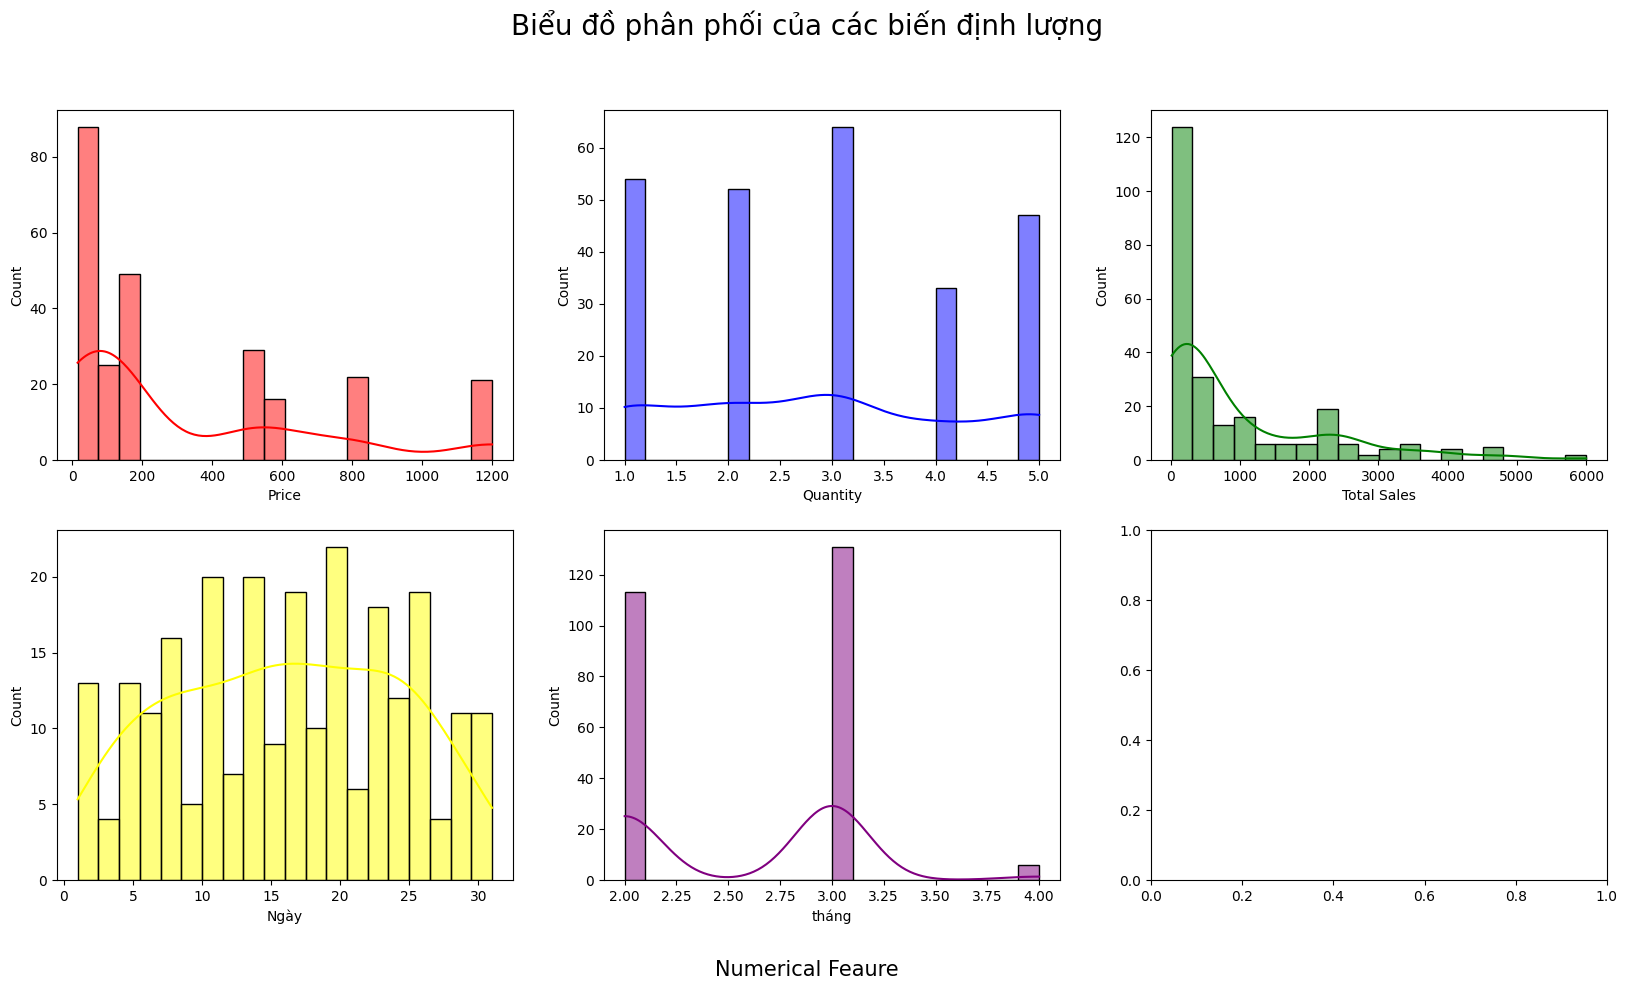

In [493]:
histogram(3,2,numerical_columns,"Biểu đồ phân phối của các biến định lượng","Numerical Feaure")


---------------------------------------------------------------------------------------------------------------------------------

🧐 ***Phân Tích Dữ Liêu***    
- *Dữ liệu định lượng bao gồm 5 cột đó là Ngày,tháng,Price,Quantity và toatal Sale*    
- *Nhìn vào biểu đồ ta thấy như sau*:  
    + *Hầu hết các biểu đồ đều là biểu đồ phân phối lệch , không có biểu đồ nào là phân phối đều hoặc phân phối chuẩn từ đố ta*  
        *Thấy rằng hầu hết các numerical feature có tính chất tạp chung vào một khoảng hoặc một vài mốc cụ thể*  
    + **Total Sale** : *Ta thấy rằng total sales là biểu đồ lệch trái , dữ liệu tập chung chủ yếu ở khoảng 1/3 đầu tiên nhiều , càng về sau càng ít*  
                        *Dựa vào describel ta thấy mặc dù giá trị total sale chạy từ 15 cho đến 6000 nhưng đến 75% dữ liệu nhỏ hơn mức 1500,  có tới 50% dữ liêu*  
                        *Nhỏ hơn mức 400 , từ đó cho ta thấy rằng dữ liệu lệch trái tập trung nhiều ở khoảng từ 15 đến 400*  
                        **=>> Kết Luận : Đa phân khách hàng sẽ lên trên sàn mua những sản phẩm gia dụng không quá đắt , ở mức tiền trung bình những sản phẩm có**  
                        **có giá trị cao thường sẽ không được khách hàng mua trên sàn onlai vi nhiều lý do khác nhau , vì vậy nên tập trung đẩy mạnh các sản phẩm**  
                        **giá thành rẻ , tiện dụng**    
---------------------------------------------------------------------------------------------------------------------------------


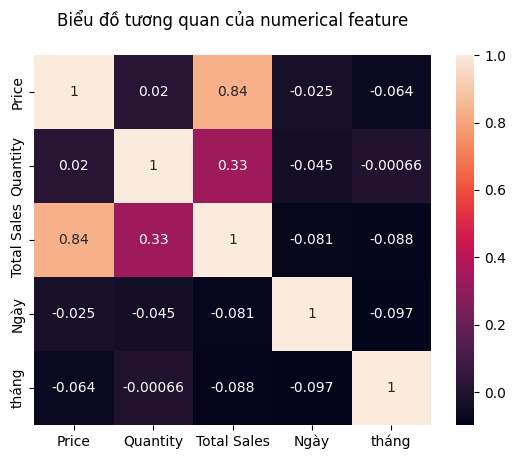

In [494]:
sns.heatmap(numerical_feature.corr(),annot=True)
plt.title("Biểu đồ tương quan của numerical feature\n");

---------------------------------------------------------------------------------------------------------------------------------
🧐 ***Phân Tích Dữ Liêu***  
- *Nhìn chung thì hầu hết các biến có tương quan với nhau rất thấp*  
- *Chỉ có total sales với price và quantity là có tương quan cao hơn*  
- *Giải thích*:  
    + *total sales và quantity có tương quan với nhau vì quantity là đánh giá của người sử dụng vì vậy đánh giá cao thì sản phẩm được mua nhiều, dẫn đến totalsale cao*  
    + *total sales và price có tương quan với nhau vì giá thánh sản phẩm cao thì sẽ mang lại tổng doanh số cao và ngược lại*   
---------------------------------------------------------------------------------------------------------------------------------


In [495]:
describle = data.describe().reset_index()
columns_describle = describle.columns.to_list()
columns_describle.remove("index")
describle

,index,Price,Quantity,Total Sales,Ngày,tháng
0,count,250.000000,250.000000,250.000000,250.000000,250.00000
1,mean,319.500000,2.868000,975.380000,16.016000,2.57200
2,std,365.719912,1.395121,1252.112254,8.174781,0.54221
3,min,15.000000,1.000000,15.000000,1.000000,2.00000
4,25%,60.000000,2.000000,100.000000,10.000000,2.00000
5,50%,150.000000,3.000000,400.000000,16.000000,3.00000
6,75%,500.000000,4.000000,1500.000000,23.000000,3.00000
7,max,1200.000000,5.000000,6000.000000,31.000000,4.00000


In [496]:
Skewnesses = []
for i in range(len(numerical_columns)):
    Skewness = skewness(describle[columns_describle[i]][1],describle[columns_describle[i]][6],describle[columns_describle[i]][2])
    Skewnesses.append(Skewness)
print("skewness của từng cột")
Skewnesses

skewness của từng cột


[np.float64(-1.4806412827431248),
 np.float64(-2.434198188532783),
 np.float64(-1.2569639785010354),
 np.float64(-2.5630042903344994),
 np.float64(-2.3680850229959893)]

---------------------------------------------------------------------------------------------------------------------------------

🧐 ***Phân Tích Dữ Liệu***  
(**Descriptive Statistics**)  
- *1️⃣.Phân bố dữ liêu*  
    + *🧪 Dựa vào skewness ta thấy tất cả skewness của các cột đều nhỏ hơn -1 từ đấy ta thấy tát cả phân phối đều lệch mạnh và là lệch trái mạnh*  
        *skewness lần lượt của các cột là Price(-1.5),Quantity(-2.4),total sale(-1.3),Ngày(-2.6),tháng(-2.4)*  
- *2️⃣.Khoảng dữ liệu*  
    + *Dựa vào describle ta thấy hai cột Quantity(chạy từ 1-5) và tháng(chạy từ 2-4) có khoảng dữ liệu khá hẹp*  
    + *Các cột còn lại như Price(chạy từ 15-1200),total_sales(chạy từ 15-6000),Ngày(chạy từ 1-31) có khoảng dữ liệu khá lớn nhất là price avf total sales*  
- *3️⃣.Độ phân tán*  
    + *Dựa vào describel ta thấy các cột price(STD:365),total sales(1252), và ngày(8) có STD khá cao từ đó ta thấy dữ liệu của các cột này có độ phân tán mạnh và khá mạnh*  
    + *Còn các cột quantity(1.39) và tháng(0.5) thì có sdt khá thấp từ đó suy ra phân phối của các feature này không phân tán mạnh tập trung quanh mean(giá trị trung bình)*  
- *4️⃣.Phát hiện bất thường*  
    +  .
- *5️⃣.Đánh giá phân phối*  
    +  .
- *6️⃣.So sánh các cột*  
    +  .  
---------------------------------------------------------------------------------------------------------------------------------


+ 🛠️ Xây dựng các hàm dùng để phân tích dữ liệu định tính

In [497]:
def total_sales(name_columns,ten_bieu_do):
    df_product = data[name_columns].value_counts().sort_values().reset_index()
    plt.figure(figsize=(20,5))
    sns.barplot(x=name_columns,
                y='count',
                data=df_product,
                palette=seaborn_palettes[randint(0,len(color_list)-1)])
    plt.title(ten_bieu_do,fontsize=20,pad=15)
    plt.xlabel(name_columns,fontsize=15)
    plt.ylabel("Count",fontsize=15)
    x = [i for i in range(len(df_product))]
    for x,y in zip(x,df_product['count']):
        plt.text(x-0.3,y+0.7,str(y) + "(Sản phẩm)")
        plt.xticks(rotation=45,ha='right')

def percent_total_sales(name_columns,ten_bieu_do):
    df_product = data[name_columns].value_counts().reset_index()
    percents = []
    for i in range(len(df_product)):
        percent = (df_product['count'][i]/df_product['count'].sum())*100
        percents.append(percent)
    percents
    plt.pie(percents,
            labels=df_product[name_columns],
            autopct="%1.1f%%",
            wedgeprops={"edgecolor":"Black","linewidth":1.3},
            colors=["#00CFFF", "#FFE600", "#FF66CC", "#66FFCC", "#C084FC", "#FF9E57", "#BFFF00", "#66CCFF", "#FF5E78", "#DAB6FC"]);
    plt.title(ten_bieu_do,fontsize=20,pad=15)
    plt.legend(loc="upper left",
            bbox_to_anchor=(-0.5,-0.1),ncol=5)

+ 📝 Phân tích dữ liệu định tính

In [498]:
categorical_feature = data.select_dtypes(include=['O'])
name_categorical_feature = categorical_feature.columns.to_list()
categorical_feature

,Order ID,Product,Category,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,Running Shoes,Footwear,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,Headphones,Electronics,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,Running Shoes,Footwear,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,Running Shoes,Footwear,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,Smartwatch,Electronics,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...
245,ORD0246,T-Shirt,Clothing,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,Jeans,Clothing,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,T-Shirt,Clothing,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,Smartwatch,Electronics,Emily Johnson,New York,Debit Card,Cancelled


In [499]:
name_categorical_feature

['Order ID',
 'Product',
 'Category',
 'Customer Name',
 'Customer Location',
 'Payment Method',
 'Status']

C:\Users\HP Victus\AppData\Local\Temp\ipykernel_4800\2417116411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=name_columns,


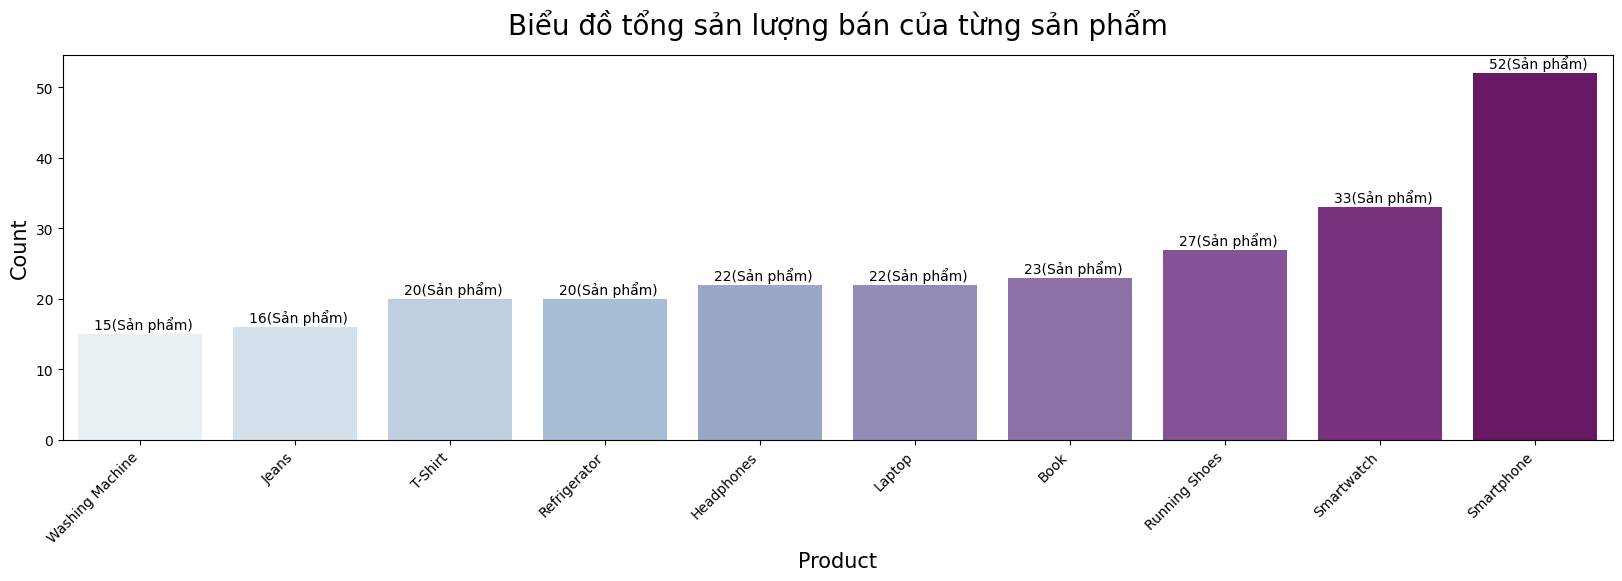

In [500]:
total_sales("Product","Biểu đồ tổng sản lượng bán của từng sản phẩm")


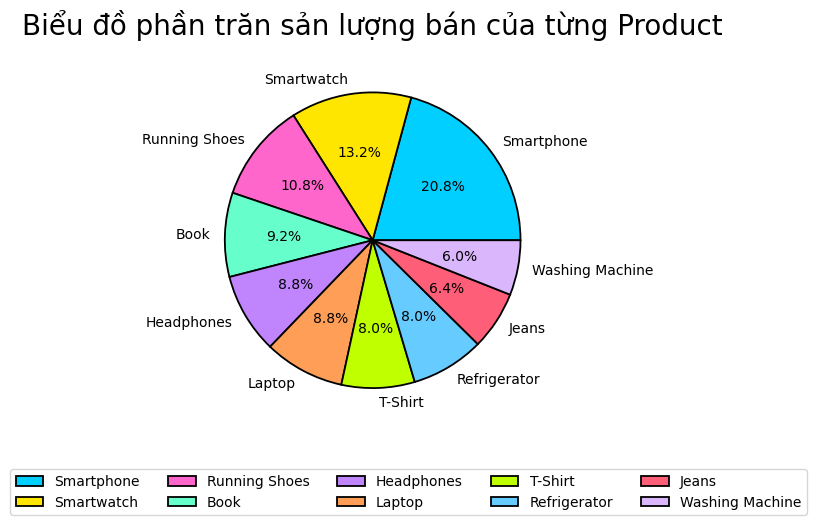

In [501]:
percent_total_sales('Product',"Biểu đồ phần trăn sản lượng bán của từng Product")

---------------------------------------------------------------------------------------------------------------------
🧐 ***Phân Tích Dữ Liệu***  
- *Nhìn vào biểu đồ ta thấy: Top3 sản phẩm bán được nhiều nhất đó là smartphone(52 sản phẩm),smartwatch(33 sản phẩm),running shoes(27 sản phẩm) lần lượt chiếm 20.8% , 13.2%*  
    *và 10.8% tổng sản lượng bán của sàn thương mại điện tử amazon từ đây ta thấy 3 sản phẩm trên có nhu cầu quan tâm cao đến từ khách hàng nên tạp trung quảng bá mạnh các*  
    *sản phẩm này trong thời gian tới*  
- *Ngược lại ta thấy: 3 sản phẩm bán chậm nhất là washing machine(15 sản phẩm), jeans(16 sản phẩm), T-shirt(20 sản phẩm) lần lượt chiếm 6.0% , 6.4% và 8% tổng sản lượng bán*  
    *của sàn thương mại amazon nguyên nhân , washing machine là một sản phẩm lớn cồng kềnh ,khó vận chuyển , khả năng lỗi cao nên mọi người thường sẽ mua trực tiếp tại các*  
    *của hàng điện máy để tiện bảo hành , lắp đặt và bảo dường, đối với jean và T-Shirt nguyên nhan do giai đoạn gần đây các cửa hàng bán T-shirt and jean đang gặp các vấn*  
    *đề , khách hàng phản hồi hàng không giống thực tế mẫu mã sai, dịch vụ đổi trả đối với các sản phẩm không vừa rất mất thời gian và công sức , một số nguyên nhân nữa*  
    *là do các sản phẩm đó đều được may theo size đại trà nên đối với người bình thường không cân đối thì rất khó chọn size nên sản lượng bán các mặt hàng này giảm sút mạnh*  
-------------------------------------------------------------------------------------------------------------------------------

C:\Users\HP Victus\AppData\Local\Temp\ipykernel_4800\2417116411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=name_columns,


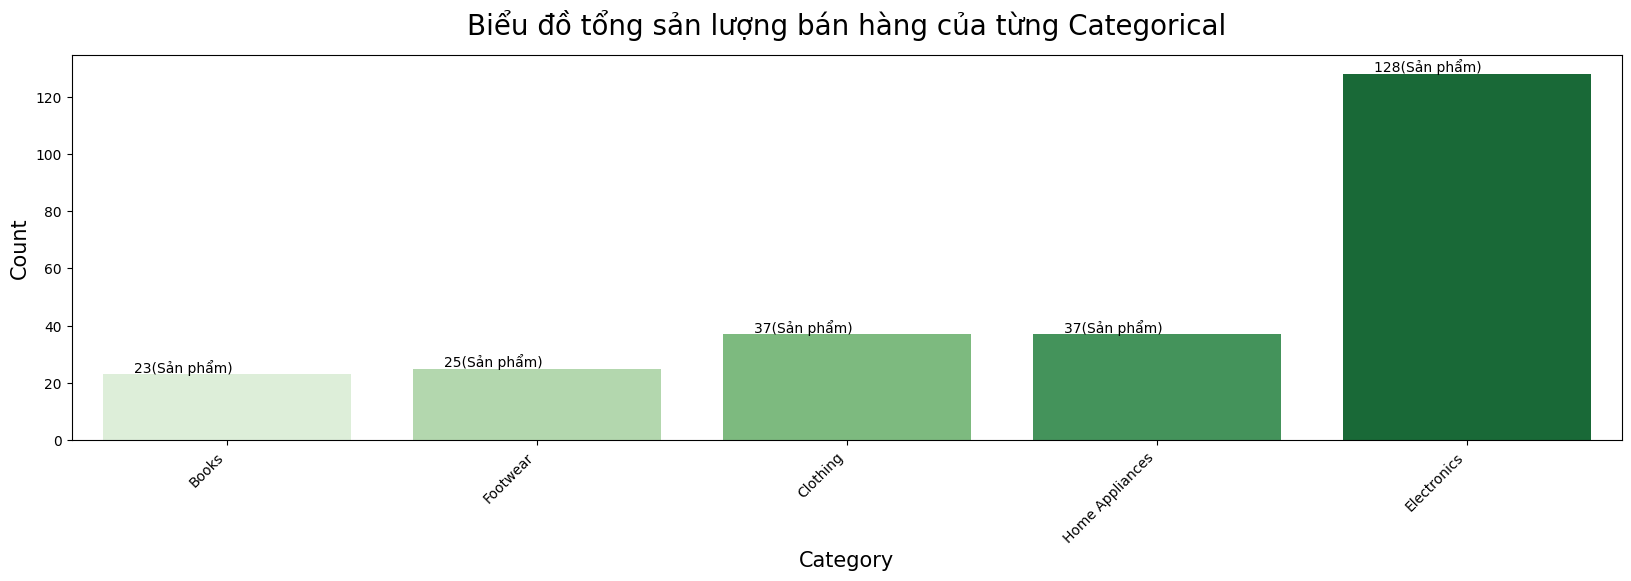

In [502]:
total_sales("Category",'Biểu đồ tổng sản lượng bán hàng của từng Categorical')

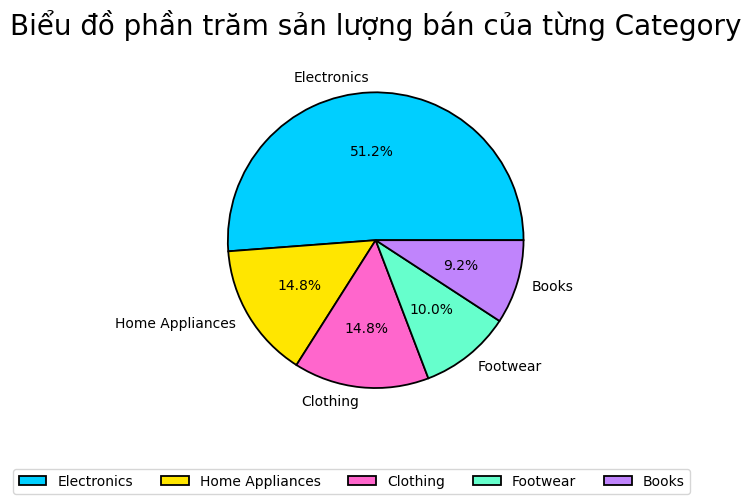

In [503]:
percent_total_sales("Category",'Biểu đồ phần trăm sản lượng bán của từng Category')


---------------------------------------------------------------------------------------------------------------
🧐 ***Phân Tích Dữ Liệu***  
- *Từ hai biểu đồ bên trên và đoạn phân tích bên trên ta thấy rằng loại hàng bán được nhiều nhất được khách hàng quan tâm và mua nhiều nhất đó là các sản phẩm liên quan đến*  
    *điện tử như smartphone, smartwatch Electronic(128 sản phẩm) chiếm đến hơn một nửa tổng sản lượng bán( 51.2% ) nguyên nhân sự đa dạng về mặt hàng và sự tiện lợi khi mua*  
    *các sản phẩm onali bới vì các đồ điện tử này không phải ở khu vực nào cũng bán , vì vậy họ phải mua onlai*  
- *Loại sản phẩm bán được ít nhất liên quan đến book vì sao, với sự phát triển của internet nhiều các đầu sách đã phát hành các ebook onlai để khách hàng có thể sử dụng hoặc*  
    *douwload về sau đó mang đi in nên dẫn đến các sản phẩm này đang dần bị lỗi thời , nên có nhiều chính sách hơn để thu hút các khách hàng*  
--------------------------------------------------------------------------------------------------------------------------

C:\Users\HP Victus\AppData\Local\Temp\ipykernel_4800\672252328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product',y='count',data=df_product_electronic,palette=seaborn_palettes[randint(0,len(seaborn_palettes))])


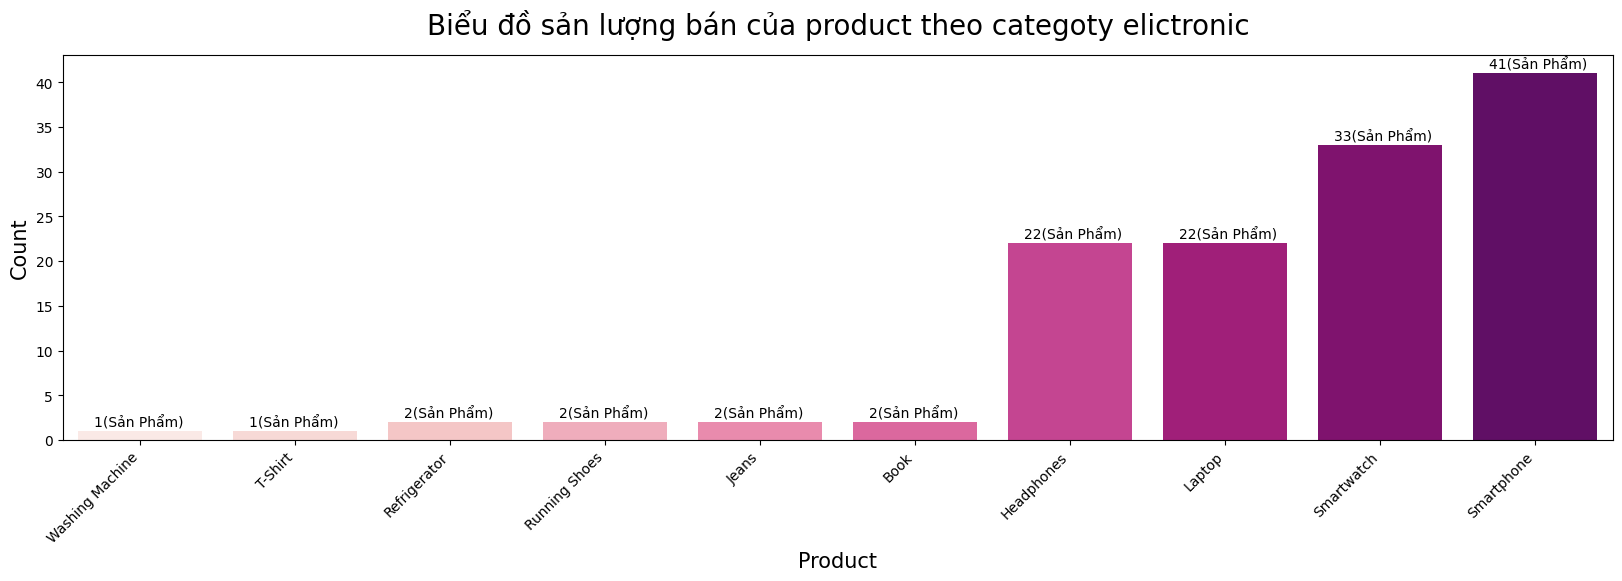

In [504]:
df_new = categorical_feature[data['Category'] == 'Electronics']
df_product_electronic = df_new['Product'].value_counts().sort_values().reset_index()
df_product_electronic
plt.figure(figsize=(20,5))
sns.barplot(x='Product',y='count',data=df_product_electronic,palette=seaborn_palettes[randint(0,len(seaborn_palettes))])
plt.title("Biểu đồ sản lượng bán của product theo categoty elictronic",fontsize=20,pad=15)
plt.xlabel("Product",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=45,ha='right');
x = [i for i in range(len(df_product_electronic))]
for x,y in zip(x,df_product_electronic['count']):
    plt.text(x-0.3,y+0.5,str(y) + "(Sản Phẩm)")

-------------------------------------------------------------------------------------------------------------------
🧐 ***Phân Tích Dữ Liệu***
- *Sản lượng bán của các sản phẩm trong mục electronic , top4 sản phẩm bán được nhiều nhất là Headphones , laptop , Smartwatch , Smartphone*
------------------------------------------------------------------------------------------------------------------------------

C:\Users\HP Victus\AppData\Local\Temp\ipykernel_4800\2417116411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=name_columns,


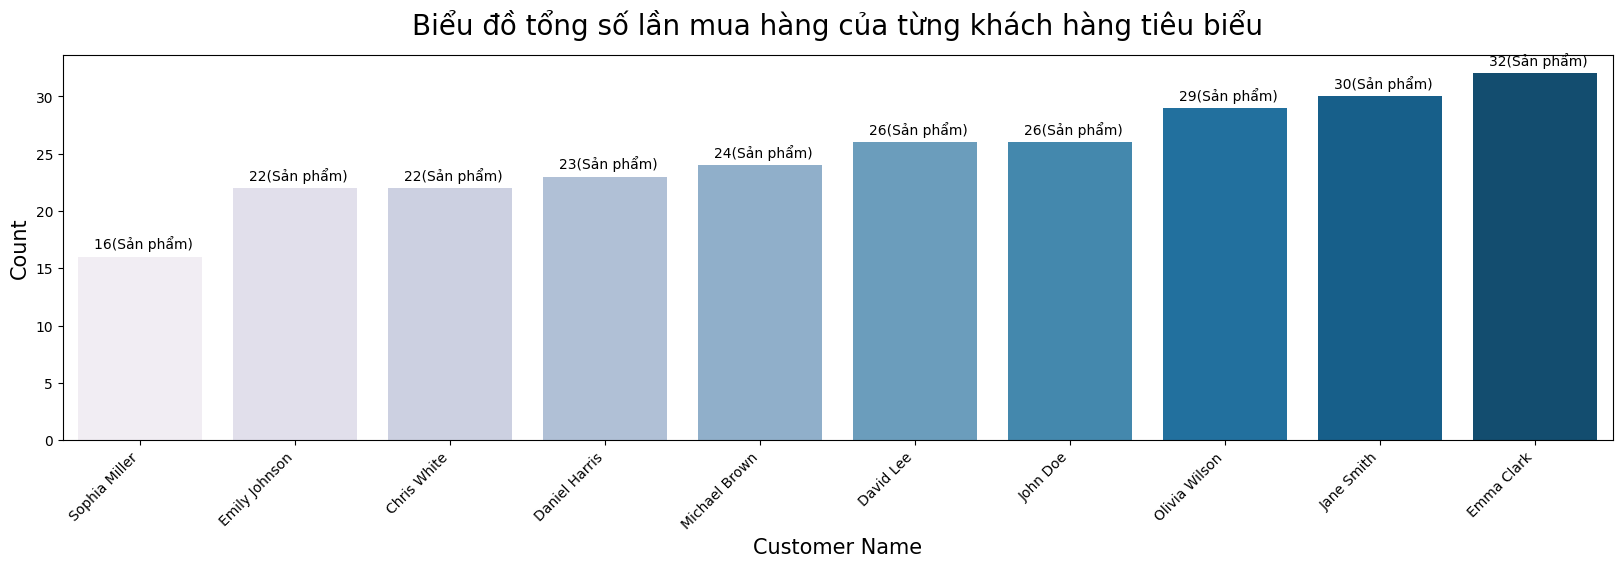

In [505]:
total_sales('Customer Name','Biểu đồ tổng số lần mua hàng của từng khách hàng tiêu biểu')

C:\Users\HP Victus\AppData\Local\Temp\ipykernel_4800\2417116411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=name_columns,


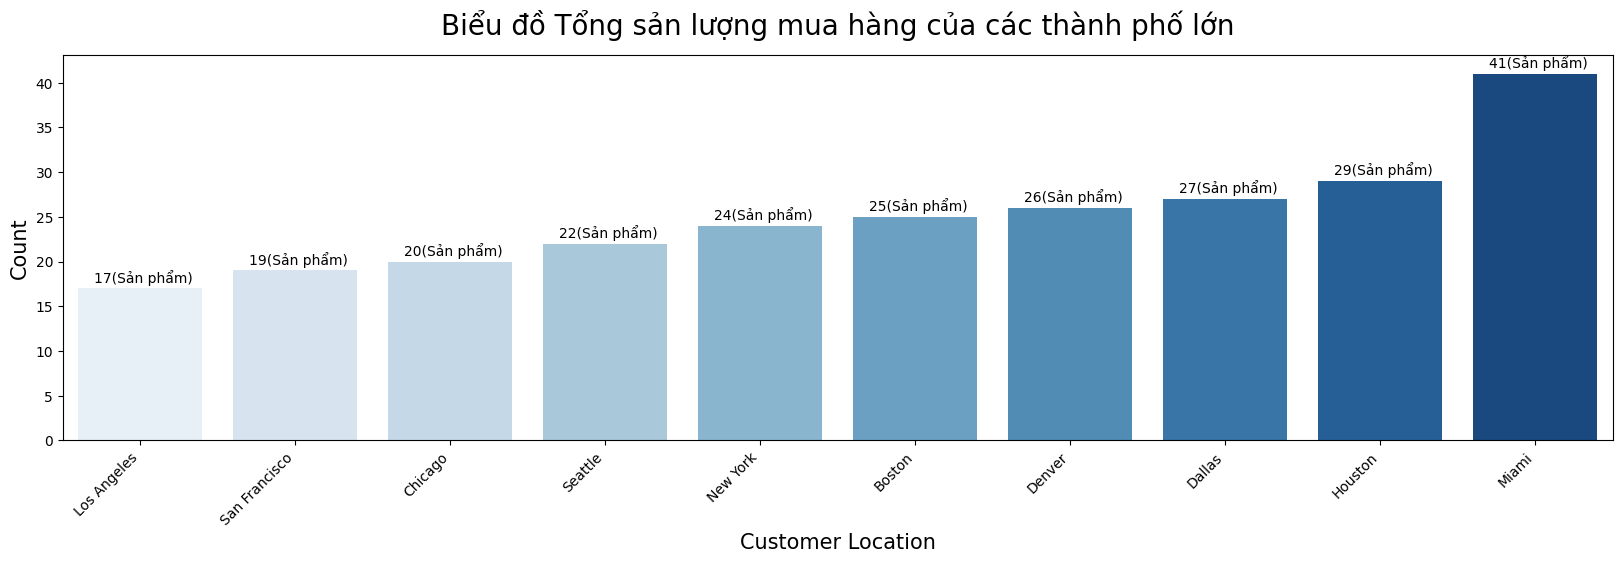

In [506]:
total_sales('Customer Location','Biểu đồ Tổng sản lượng mua hàng của các thành phố lớn')

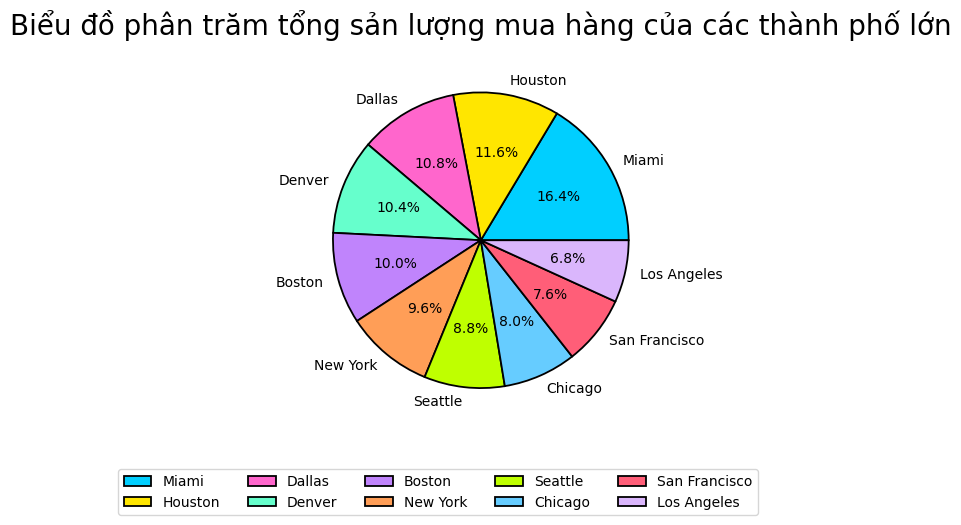

In [507]:
percent_total_sales('Customer Location','Biểu đồ phân trăm tổng sản lượng mua hàng của các thành phố lớn')


C:\Users\HP Victus\AppData\Local\Temp\ipykernel_4800\2417116411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=name_columns,


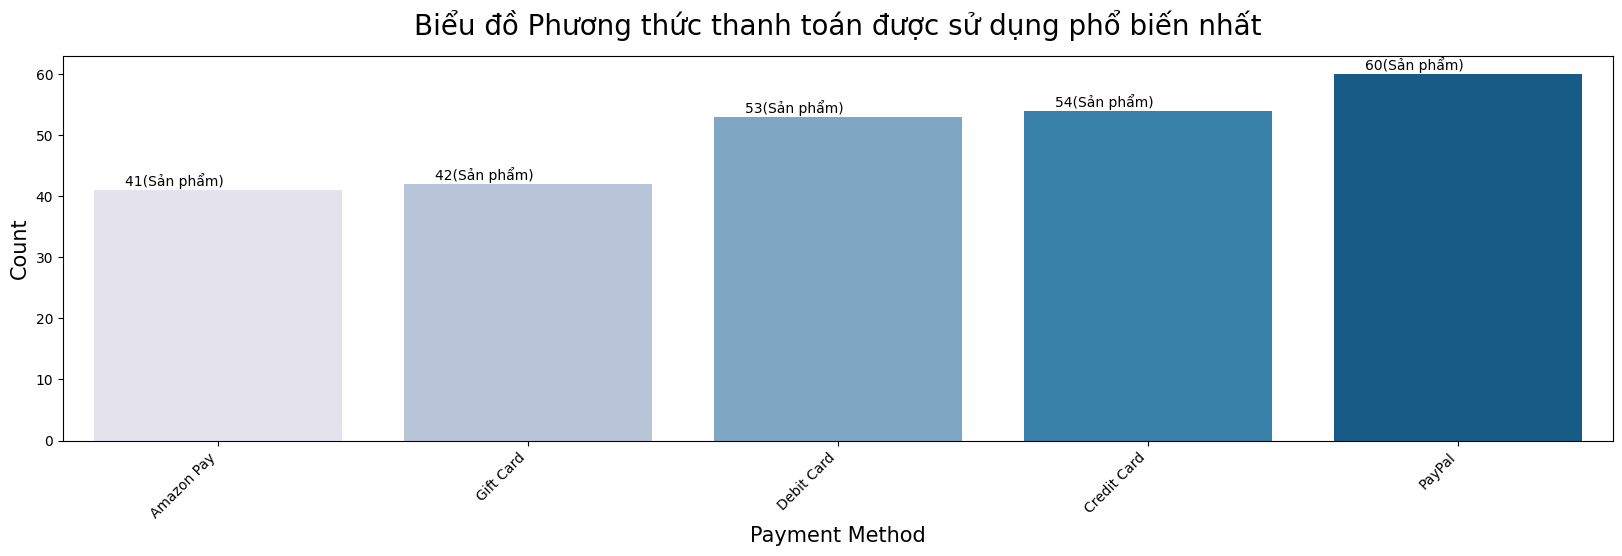

In [508]:
total_sales('Payment Method','Biểu đồ Phương thức thanh toán được sử dụng phổ biến nhất')

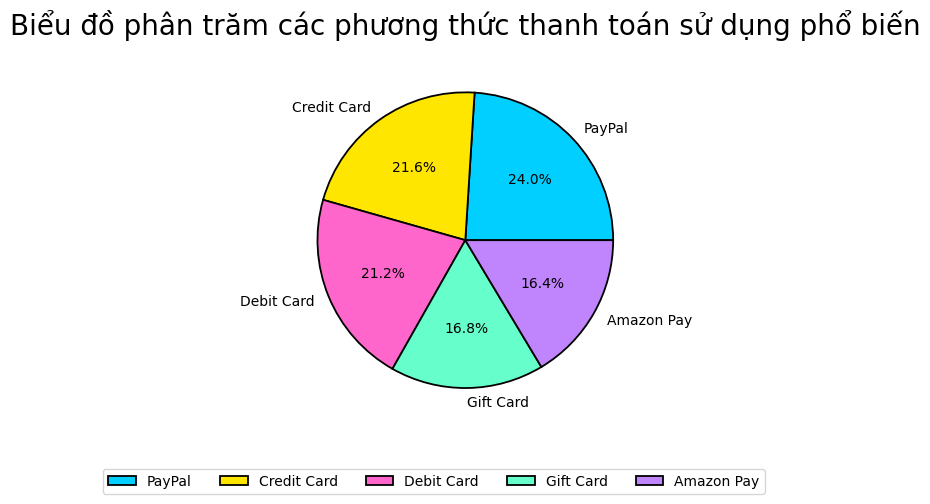

In [509]:
percent_total_sales('Payment Method','Biểu đồ phân trăm các phương thức thanh toán sử dụng phổ biến')


In [512]:
data.head()

,Order ID,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,Ngày,tháng
0,ORD0001,Running Shoes,Footwear,60.0,3.0,180,Emma Clark,New York,Debit Card,Cancelled,14,3
1,ORD0002,Headphones,Electronics,100.0,4.0,400,Emily Johnson,San Francisco,Debit Card,Pending,20,3
2,ORD0003,Running Shoes,Footwear,60.0,2.0,120,John Doe,Denver,Amazon Pay,Cancelled,15,2
3,ORD0004,Running Shoes,Footwear,60.0,3.0,180,Olivia Wilson,Dallas,Credit Card,Pending,19,2
4,ORD0005,Smartwatch,Electronics,150.0,3.0,450,Emma Clark,New York,Debit Card,Pending,10,3
